In [19]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

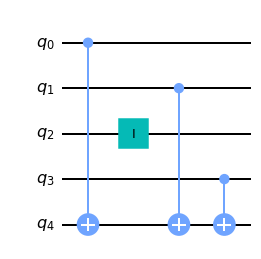

In [20]:
n = 4
s = '1011'

S_circuit=QuantumCircuit(n+1)
for j in range(n):
    if s[n-j-1] == '0':
        S_circuit.i(j)
    else:
        S_circuit.cx(j,n)

S_circuit.draw(output='mpl')

In [21]:
S_circuit = S_circuit.to_gate()
S_circuit.name = "S box"

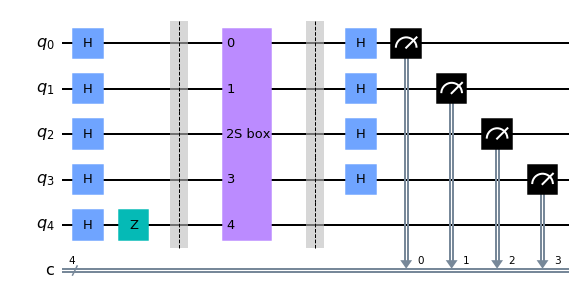

In [22]:
bv_qc=QuantumCircuit(n+1,n)
for i in range(n+1):
    bv_qc.h(i)
bv_qc.z(n)

bv_qc.barrier()

bv_qc.append(S_circuit, range(n+1))

bv_qc.barrier()

for i in range(n):
    bv_qc.h(i)

for i in range(n):
    bv_qc.measure(i, i)
    
bv_qc.draw(output='mpl')